# Supplementary Materials to the Manuscript: Combining temperate fruit

tree cultivars to fit spring phenology models

Lars Caspersen [](https://orcid.org/0009-0000-3057-7327) (Department of Horticultural Sciences, Institue of Crop Science and Resource Conservation (INRES), University of Bonn, Auf dem Hügel 6, 53121 Bonn, Germany)  
Katja Schiffers [](https://orcid.org/0000-0003-2559-6579) (Department of Horticultural Sciences, Institue of Crop Science and Resource Conservation (INRES), University of Bonn, Auf dem Hügel 6, 53121 Bonn, Germany)  
Katherine Jarvis-Shean [](https://orcid.org/0000-0001-7097-0625) (University of California, Division of Agriculture and Natural Resources,70 Cottonwood St, Woodland, CA 95695, USA)  
Eike Luedeling [](https://orcid.org/0000-0002-7316-3631) (Department of Horticultural Sciences, Institue of Crop Science and Resource Conservation (INRES), University of Bonn, Auf dem Hügel 6, 53121 Bonn, Germany)  
November 19, 2025

Phenological datasets for temperate fruit trees are often short , fragmented and geographically restricted, which hampers the development of cultivar-specific spring phenology models. To address this, we propose a novel calibration approach (“combined-fitting”), which pools observations from several cultivars of the same species, distinguishing between shared and cultivar-specific parameters. This method requires fewer observations per cultivar and allows jointly analyzing cultivars of the same species. We evaluate combined-fitting using the PhenoFlex framework, comparing it to a baseline model and to models that are fitted only with data for single cultivars (“cultivar-fit”). Our analysis is based on flowering data from nine almond, six apricot and six sweet cherry cultivars across Mediterranean (Spain, Morocco, Tunisia) and German climates. The combined-fit model failed to achieve higher prediction accuracy compared to the cultivar-fit and the baseline approach, as evidenced by similar root mean square errors across the data splits and calibration dataset sizes. When comparing the estimated parameters of the chill and heat accumulation submodels, we observed a large variation among cultivars of the same species in the cultivar-fit models. In contrast and by design, the combined-fit yielded only one parameter set for cultivars of the same species. Our findings demonstrate that integrating data from multiple cultivars can yield spring phenology models with high accuracy. Even though the combined-fit approach did not outperform the cultivar-fit approach, combined-fitting offers a practical solution for spring phenology modeling with limited datasets and facilitates comparison across cultivars of the same species.

## Introduction

This document contains supplementary materials for the journal article: *Combining temperate fruit tree cultivar to fit spring phenology models*. It includes additional tables and files that were not part of the main article, as well as the code to replicate the analyses.

The phenology analyzed here are part of a long-term phenology dataset \[@luedeling_long-term_2024\] compiled within the *Adapting Mediterranean Orchards (AdaMedOr)* project. Of the more than 270 cultivars in the dataset, a subset of 110 cultivars has been analyzed by @caspersen_contrasting_2025 using the PhenoFlex framework \[@luedeling_phenoflex_2021\], available via the R package *chillR* \[@luedelingChillRStatisticalMethods2024\]. In addition to model calibration, the analysis includes climate change impact projections on future bloom dates.

More than 50% of the cultivars in the dataset were not analyzed because the bloom observations were considered too short for calibration with PhenoFlex. We propose an alternative calibration method, **combine- fitting**, which reduces the number parameters estimated per cultivar and may allow the joint analysis of cultivars of the same fruit tree species. We evaluate combined-fit approach for three temperate fruit and nut species (almond, apricot, sweet cherry) and compare the results with those from a baseline model and from a common calibration approach in which each cultivar is calibrated seperately. We perform the analysis for the full dataset and for an artificially shortened dataset.

Parts of the function that we present in this document are available via the R packages *evalpheno* \[@caspersen_evalpheno_2025\] and *LarsChill* \[@caspersen_larschill_2025\]. Both packages are currently available via GitHub.

## Supplementary Table

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

`summarise()` has grouped output by 'Species', 'Location', 'Country'. You can
override using the `.groups` argument.

  -------------------------------------------------------------------------------
  Species      Location          Country   Cultivar      Year Start Year End    n
  ------------ ----------------- --------- ------------- ---------- -------- ----
  Almond       Meknes            Morocco   Ferragnes           1977     2014   38

  Almond       Meknes            Morocco   Marcona             1977     2014   38

  Almond       Meknes            Morocco   Tuono               1974     2014   41

  Almond       Santomera         Spain     Achaak              1997     2019   13

  Almond       Santomera         Spain     Desmayo             1997     2022   21

  Almond       Santomera         Spain     Marta               2005     2021   14

  Almond       Sfax              Tunisia   Fasciuneddu         1981     2015   22

  Almond       Sfax              Tunisia   Mazzetto            1981     2015   22

  Almond       Sfax              Tunisia   Nonpareil           1981     2016   23

  Apricot      Cieza             Spain     Bulida              2003     2022   21

  Apricot      Cieza             Spain     Dorada              2003     2022   20

  Apricot      Zaragoza          Spain     Goldrich            1999     2021   21

  Apricot      Zaragoza          Spain     Harcot              1999     2022   22

  Apricot      Zaragoza          Spain     Henderson           1999     2021   21

  Apricot      Zaragoza          Spain     Sunglo              1999     2022   22

  Sweet Cherry Klein-Altendorf   Germany   Burlat              1978     2015   29

  Sweet Cherry Klein-Altendorf   Germany   Regina              1988     2020   32

  Sweet Cherry Klein-Altendorf   Germany   Schneiders          1984     2019   32

  Sweet Cherry Zaragoza          Spain     Rainier             1991     2022   24

  Sweet Cherry Zaragoza          Spain     Sam                 1991     2022   24

  Sweet Cherry Zaragoza          Spain     Van                 1991     2022   24
  -------------------------------------------------------------------------------

  : Table S1. Overview on the full bloom dataset for almond, apricot and
  sweet cherry cultivars


## Supplementary Figure

<figure>
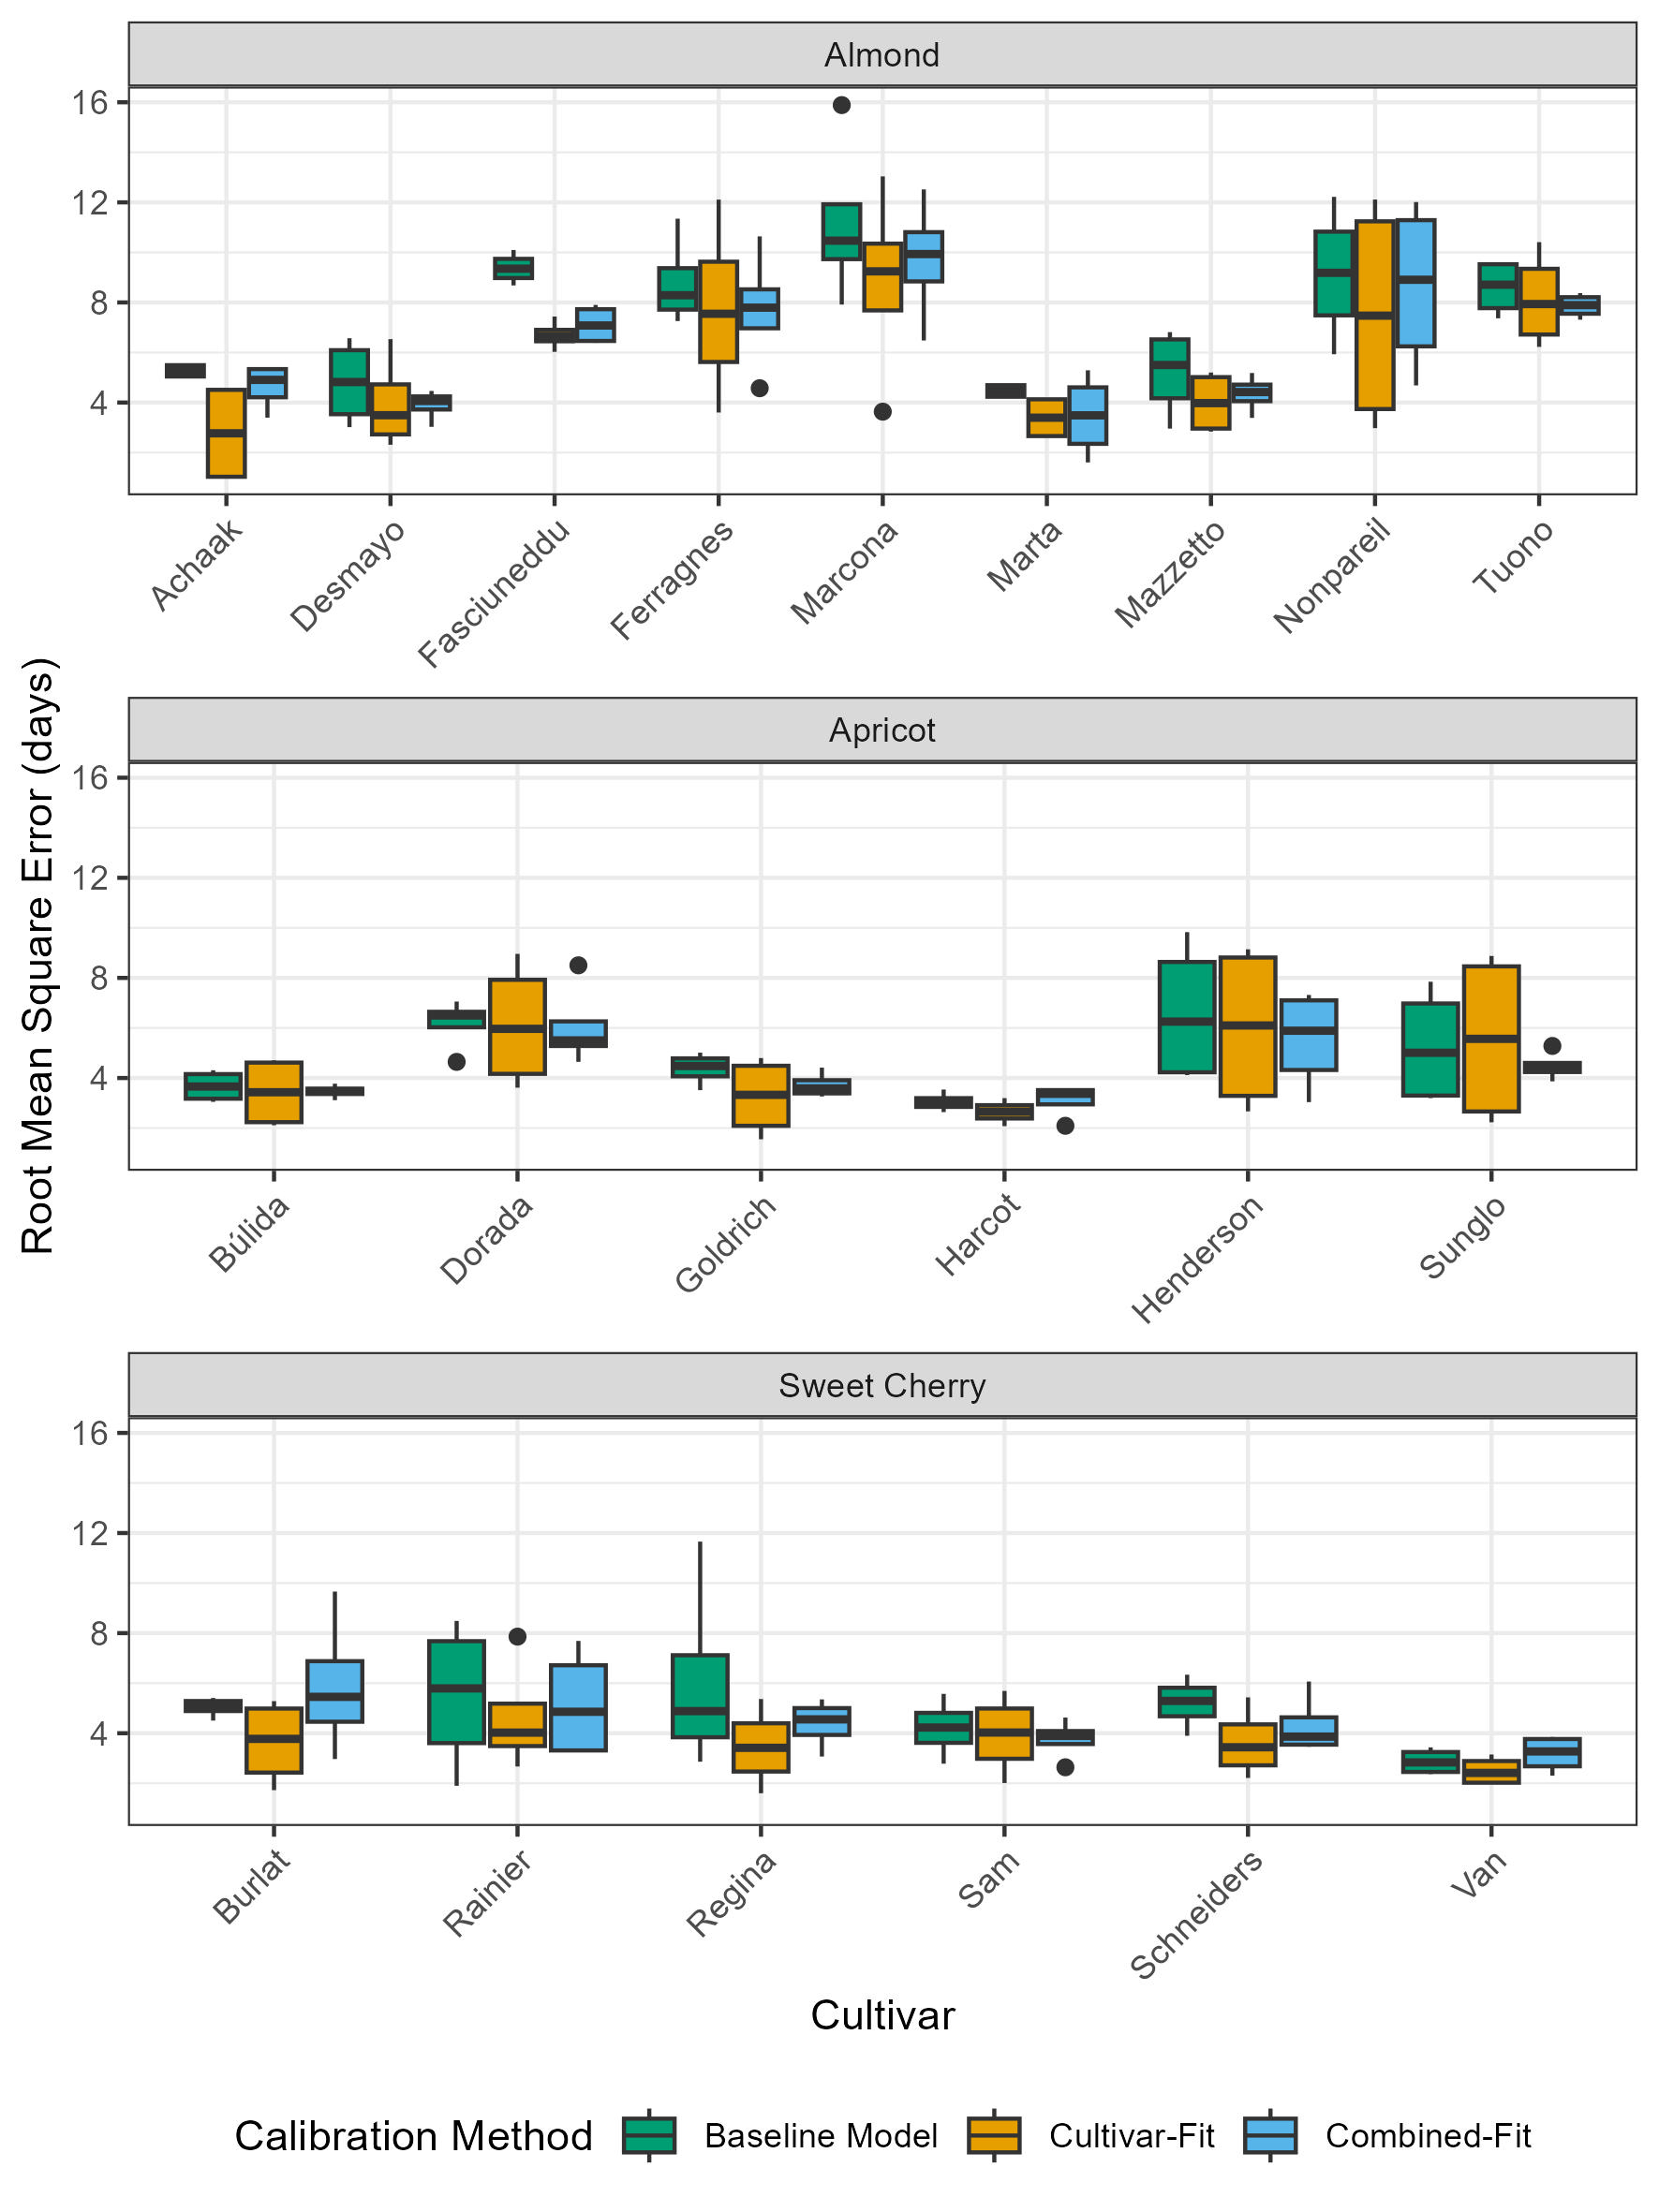
<figcaption aria-hidden="true">Figure S1. Root Mean Square Error (RMSE, days) of predicted bloom dates for each species (almond, apricot, sweet cherry) and cultivar (indicated at the x-axis). Boxplot summarizes RMSE for calibration and validation split and for ‘scarce’ and ‘full’ calibration sets. Calibration methods are indicated by color, green for ‘Baseline Model’, yellow for ‘Cultivar-Fit’ and blue for ‘Combined-Fit’.</figcaption>
</figure>

## Supplementary Code

### Data splitting

This notebook shows the preparation of the phenology data. Performs calibration and validation data splits. Check out the notebook for more details:

[Split data in calibration and validation](https://larscaspersen.github.io/combined-fitting-bloom/notebooks/01-prepare-phenology.html)

### Model Calibration

When calibrating the model, we specified the search space for each model parameter. We substituted the model parameters E<sub>0</sub>, E<sub>1</sub>, A<sub>0</sub> and A<sub>1</sub> of the chill submodel with intermediate parameters $\theta^*$ , $\theta_c$ , $\pi_c$ and $\tau$ , following @egea_reducing_2021 and implemented for PhenoFlex by @caspersen2024. Additionally, we restricted parameters, so that the `E10` quotient of the process modeling chill formation and degradation ranges between 1.5 and 3.5, a range said to be realistic in biological systems \[@egea_reducing_2021; @luedeling_phenoflex_2021\]. During model calibration, the optimization algorithm ran for 5,000 iterations for baseline model; 30,000 evaluations for single-fit; 50,000 evaluations for combined fit. We chose different total number of evaluations for the calibration methods, to account for varying number of model parameters estimated during each individual calibration step. The optimization algorithm estimates model parameters by minimizing the residual sum of squares (RSS) of predicted and observed bloom dates. In a pre-trial we confirmed that by the end of the total number of model evaluations the RSS converged, indicating that the algorithm fails to find parameters providing better model performance.

These three notebooks perform the model calibration. The notebook for almond calibration has also some more comments on the different procedures. The notebooks for apricot and sweet cherry only contain the uncommented code.

-   [Almond calibration](https://larscaspersen.github.io/combined-fitting-bloom/notebooks/02-calibrate-almond.html)

-   [Apricot calibration](https://larscaspersen.github.io/combined-fitting-bloom/notebooks/03-calibrate-apricot.html)

-   [Sweet Cherry calibration](https://larscaspersen.github.io/combined-fitting-bloom/notebooks/04-calibrate-cherry.html)

### Model Evaluation

This code shows how the calibrated models are evaluated. This script generates figures and tables for the manuscript.

[Generate figures for the manuscript](https://larscaspersen.github.io/combined-fitting-bloom/notebooks/05-make-figures.html)

## References